# Финальный проект



# Банки — Сегментация пользователей по потреблению

## Содержание



[]
[](#to_content.)
* [Описание проекта и описание данных](#0.)
* [Загрузка данных и предобработка](#1.)
* [Исследовательский анализ данных](#2.)
    * [Корреляционная таблица](#2.1)
    * [products](#2.2)
    * [gender](#2.3)
    * [city](#2.4)
    * [age](#2.5)
    * [loyalty](#2.6)
    * [churn](#2.7)
    * [objects](#2.8)
    * [creditcard](#2.9)
    * [salary](#2.10)
    * [balance](#2.11)
    * [score](#2.12)
    * [Вывод](#2.13)
* [Формулировка и проверка статистических гипотез](#3.)
    * [Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним](#3.1)
    * [Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним](#3.2)
* [Вывод](4.)

## Описание проекта  и описание данных 
<a name="0."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Заказчик: Менеджер продукта, который хочет выделить основные аудитории и разработать программы мероприятий для каждой.

Основной вопрос: На какие основные сегменты делятся клиенты банка и характеристики каждого из этих сегментов?

Задача: Проанализировать клиентов регионального банка и сегментировать 
пользователей по количеству потребляемых продуктов.

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Загрузка данных  и предобработка 
<a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
# загружаю необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загружаю таблицу
df=pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
# смотрю таблицу
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# смотрю инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# смотрю все ли клиеты в таблицы уникальны
df['userid'].nunique()

10000

In [6]:
# смотрю дубликаты
df.duplicated().sum()

0

In [7]:
# смотрю describe
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# изменяю регистр столбцов 
df.columns=df.columns.str.lower()

In [9]:
# смотрю список с названиями столбцов
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [10]:
# изменяю названия столбцов
df.rename(columns={'userid': 'id',
                   'estimated_salary': 'salary'}, inplace=True)

In [11]:
# изменяю порядок столбцов
df = df[['id', 'city', 'gender', 'age', 'products', 'salary', 'balance', 'objects', 'score', 'loyalty', 'creditcard', 'churn']]

In [12]:
df

,id,city,gender,age,products,salary,balance,objects,score,loyalty,creditcard,churn
0,15677338,Ярославль,Ж,42,1,101348.88,NaN,2,619,1,1,1
1,15690047,Рыбинск,Ж,41,1,112542.58,83807.86,1,608,1,0,0
2,15662040,Ярославль,Ж,42,3,113931.57,159660.80,8,502,0,1,1
3,15744090,Ярославль,Ж,39,2,93826.63,NaN,1,699,0,0,0
4,15780624,Рыбинск,Ж,43,1,79084.10,125510.82,2,850,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,Ярославль,М,39,2,96270.64,NaN,5,771,0,1,0
9996,15612628,Ярославль,М,35,1,101699.77,57369.61,10,516,1,1,0
9997,15627268,Ярославль,Ж,36,1,42085.58,NaN,7,709,1,0,1
9998,15725091,Ростов Великий,М,42,2,92888.52,75075.31,3,772,0,1,1


### Вывод: 
У меня есть таблица с данными о клиентах. Всего 10000 строк, все клиенты в таблице уникальны, дубликатов в данных нет, есть пропуски в столбце с балансом. Я считаю, что пропуски в столбце с балансом ничем заменить я не могу, так как пропусков около 40 процентов и поэтому замена пропусков на какие-либо значения существенно скажется на качестве данных. Могу предположить, что пропуски могут связаны с тем, что клиенты имеют в банке продукт не предпалагающий баланса. Например, кредит или кредитную карту. Я изменил порядок столбцов и регистр их названий.

<div class='alert alert-success'>
Весьма бодрое начало. Мне понравилось что ты приводишь к нижнему регистру названия столбцов с помощью встроенных методов. Также для просмотра стандартных описательных статистик рекомендую использовать метод round для округления итоговых значений в тбалице для удобства восприятия информации.

## Исследовательский анализ данных 
<a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Корреляционная таблица
<a name="2.1"></a><br/>

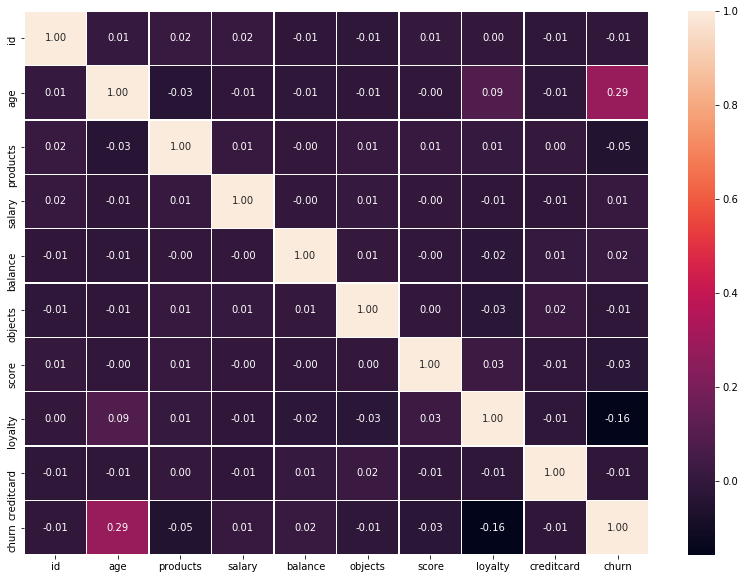

In [13]:
#строю корреляционную таблицу
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

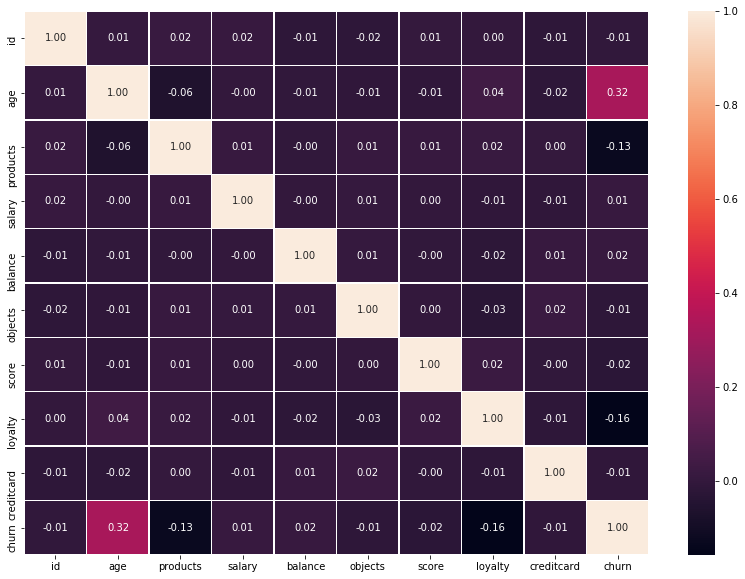

In [14]:
cm_2 = df.corr(method ='spearman')
plt.figure(figsize=(14, 10))
sns.heatmap(cm_2, annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

<div class='alert alert-success'>
Круто что владеешь этой техникой визуализации, по ней хорошо видно что значимых корреляций не наблюдается. В таком случае всегда рекомендуется задуматься о том, что у тебя возможно есть какие-то нелинейные связи. Значит можноп попробовать другие способы расчета корреляции, например с помощьб метода Спирмена или Phik.

Наиболее коррелирующими являются показатели возраста и оттока

In [15]:
#строю таблицу
df_age = df.pivot_table(index = 'churn', values = 'age', aggfunc = 'median').reset_index()

In [16]:
df_age

,churn,age
0,0,36
1,1,45


Медианный возраст ушедших клиентов 45 лет, а оставшихся 45 лет

### products
<a name="2.2"></a><br/>

In [17]:
# строю pivot_table, который будет показывать сколько клиентов сколько используют продуктов
df_pro = df.pivot_table(index = 'products', values = 'id', aggfunc = 'count').reset_index()

In [18]:
df_pro['count(%)'] = ((df_pro['id']/df_pro['id'].sum())*100).round(1)

In [19]:
df_pro

,products,id,count(%)
0,1,5084,50.8
1,2,4590,45.9
2,3,266,2.7
3,4,60,0.6


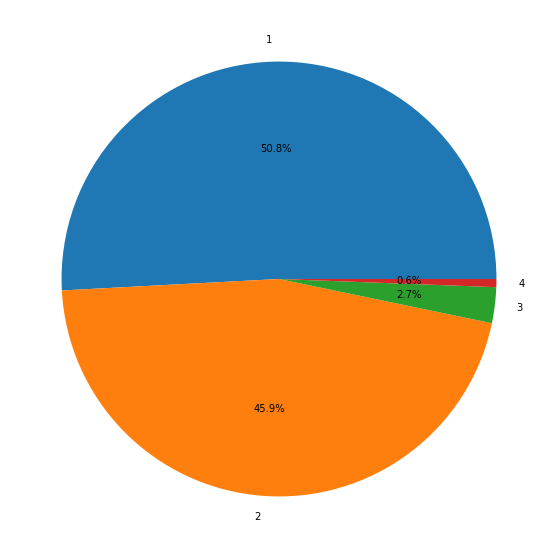

In [20]:
# рисую график
plt.figure(figsize=(14, 10))
plt.pie(df_pro['id'], labels = df_pro['products'], autopct='%.1f%%')
plt.show()

Этот график отражает каке количество пользователей каим количеством продуктов пользуется. Из него можно сделать вывод, что половина пользователей использует всего один продукт, 46% процентов пользователей использует всего два продуктаб 2,7% процента пользоватлей использует три продукта и 0,6 процентов использует четыре продукта.

### gender
<a name="2.3"></a><br/>

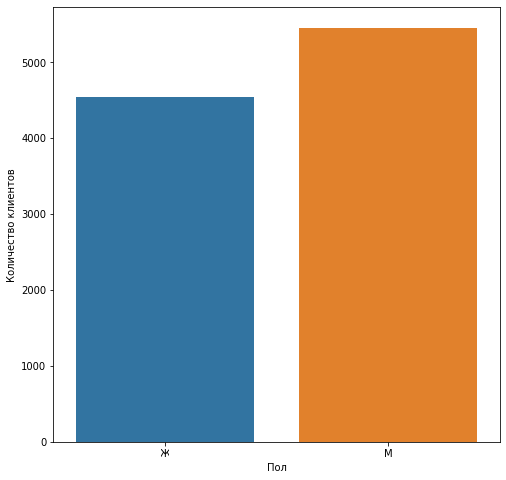

In [21]:
# смотрю сколько в таблице  мужчин и женщин
plt.figure(figsize = (8,8))
sns.countplot(data=df, x="gender")
plt.ylabel('Количество клиентов')
plt.xlabel('Пол')
plt.show()

В таблице около 4500 тысяч женщин и 5500 мужчин. 

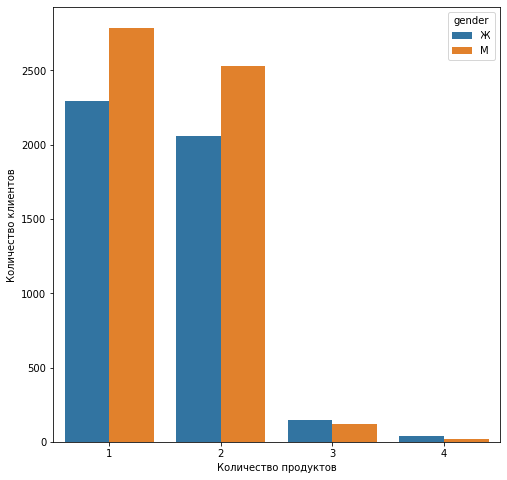

In [22]:
#строю график зафисимости колчества продуктов от пола
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'],hue ='gender',data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()

На этом графике видно, что не смотря на то что женщин в таблице меньше они чаще имеют 3 или 4 продукта банка

### city
<a name="2.4"></a><br/>

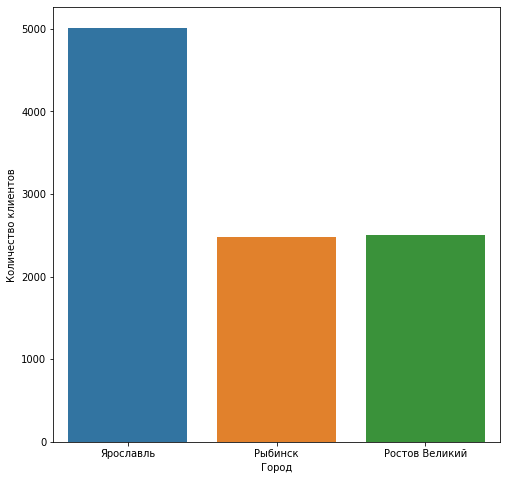

In [23]:
#смотрю из каких городов пользователели 
plt.figure(figsize = (8,8))
sns.countplot(x=df['city'],data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Город')
plt.show()

На этом графике видно, что из пользователей из Ярославля 5000 и из Рыбинска и Ростова Великого по 2500

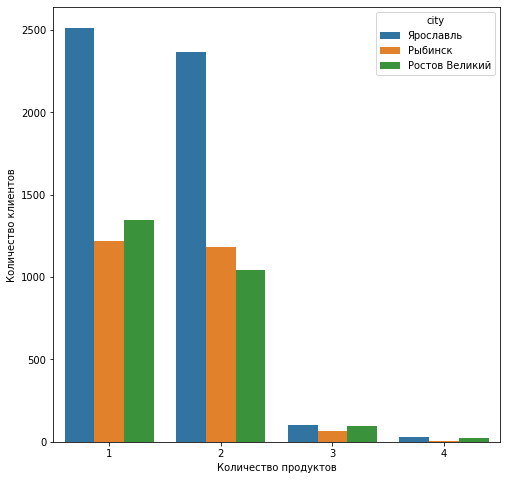

In [24]:
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'],hue ='city',data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()

### age
<a name="2.5"></a><br/>

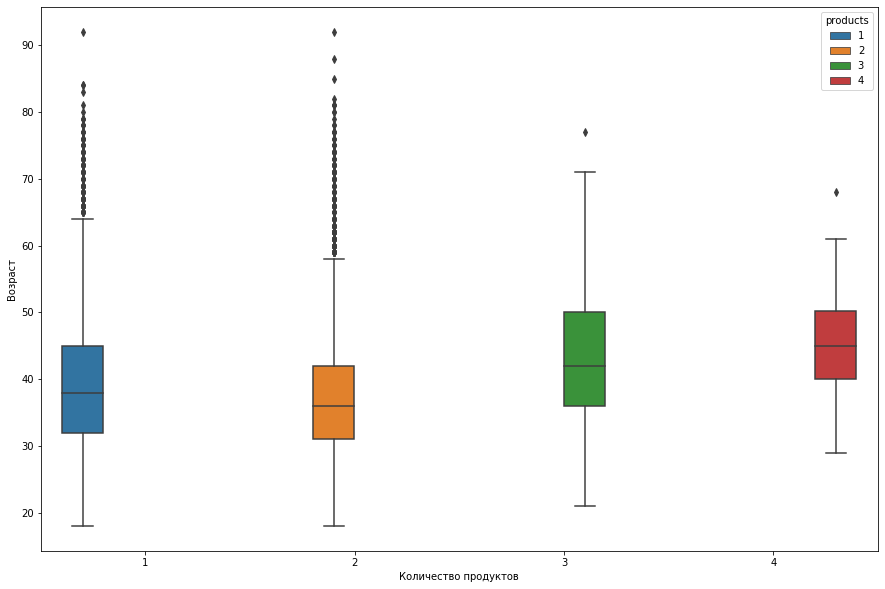

In [25]:
#смотрю средний возраст клиентов в зависимости от количества продуктов
plt.figure(figsize = (15,10))
sns.boxplot(x = 'products', y='age', hue = 'products',  data=df)
plt.ylabel('Возраст')
plt.xlabel('Количество продуктов')
plt.show()

In [26]:
df_age_products = df.pivot_table(index = 'products', values = 'age', aggfunc = 'mean').reset_index()

In [27]:
df_age_products.round(1)

,products,age
0,1,39.7
1,2,37.8
2,3,43.2
3,4,45.7


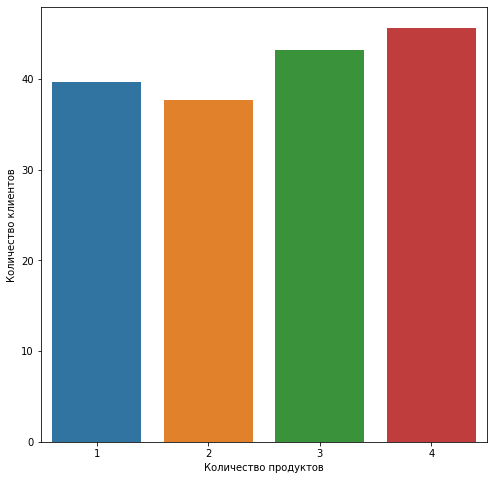

In [28]:
plt.figure(figsize = (8,8))
sns.barplot(x=df_age_products['products'],y = df_age_products['age'], data=df_age_products)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()

На этом графике видно, что средний возраст у клиентов с четырмя продуктами выше, чем у остальных (около 45 лет)

### loyalty
<a name="2.6"></a><br/>

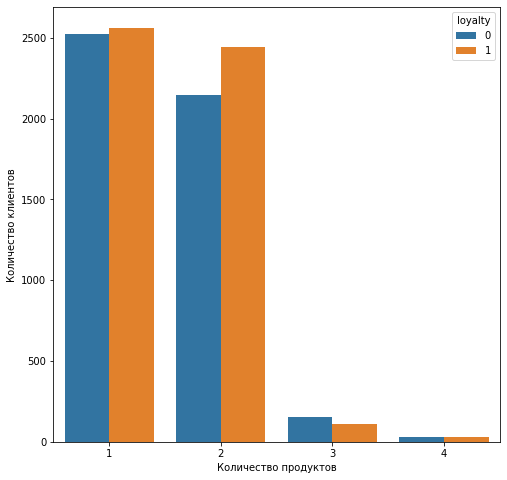

In [29]:
#смотрю лояльность в зависимости от количества продуктов
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'],hue ='loyalty',data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()

Можно сделать вывод,что среди пользователей имеющих три продукта больше неативных клиентов, средт пользователей имеющих четыре  продукта их поровну, так же и с имеющими один продукт. Больше активных среди имеющих два продукта.

### churn
<a name="2.7"></a><br/>


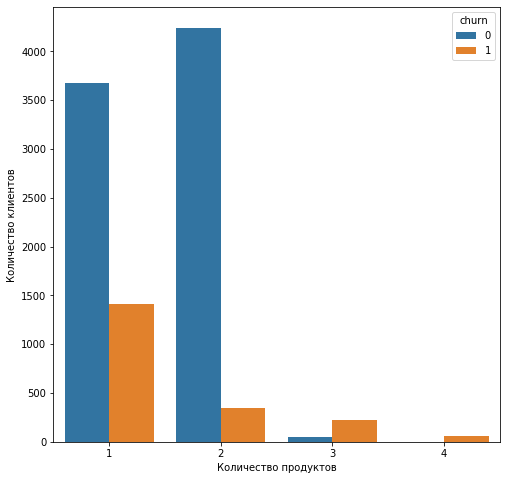

In [30]:
# строю график 
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'], hue='churn',  data=df)
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

Интересно, что среди имеющих 3 и 4 продукта уходящих гораздо больше чем остающихся. Видимо клиентов что-то перестало устраивать.

### odjects
<a name="2.8"></a><br/>


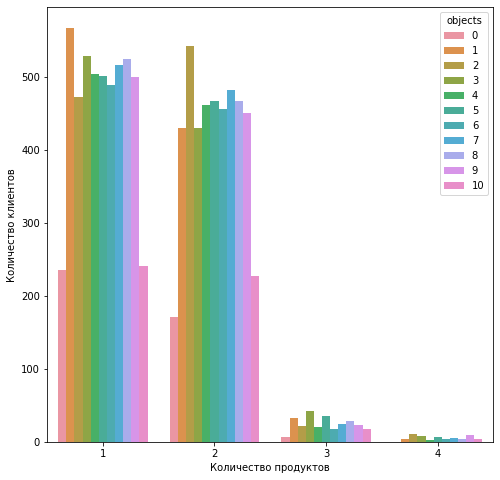

In [31]:
# строю график количества объектов в собственности
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'], hue='objects',  data=df)
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

Мне кажется, не логичным, что среди клиентов больше тех, кто имеет 3 и более объектов.

### creditcard
<a name="2.9"></a><br/>

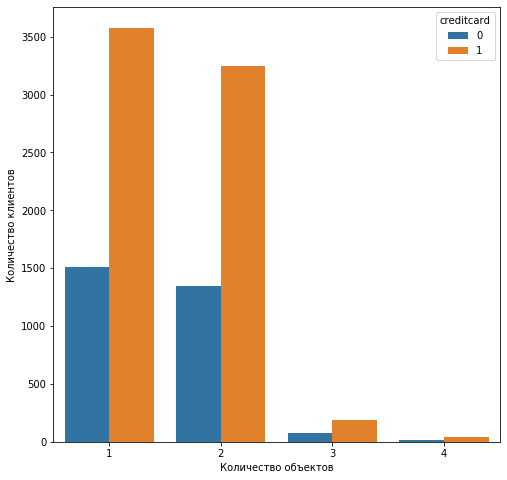

In [32]:
plt.figure(figsize = (8,8))
sns.countplot(x=df['products'], hue='creditcard',  data=df)
plt.xlabel('Количество объектов')
plt.ylabel('Количество клиентов')
plt.show()

На этом графике видно, что большая часть клиенто имеет кредитную карту

### salary
<a name="2.10"></a><br/>

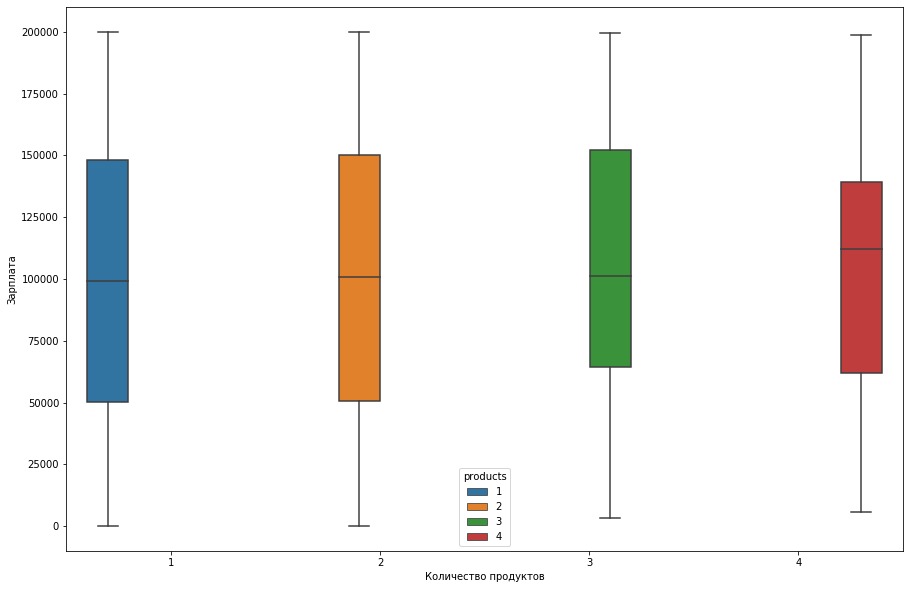

In [33]:
#смотрю средний возраст клиентов в зависимости от количества продуктов
plt.figure(figsize = (15,10))
sns.boxplot(x = 'products', y='salary', hue = 'products',  data=df)
plt.ylabel('Зарплата')
plt.xlabel('Количество продуктов')
plt.show()

In [34]:
df_salary = df.pivot_table(index = 'products', values = 'salary', aggfunc = 'mean').reset_index()

In [35]:
df_salary

,products,salary
0,1,99487.256851
1,2,100452.012821
2,3,104318.130564
3,4,104763.723333


На этом графике вижно, что средняя зарплата у клиентов примерно одинаковая (около 100000), но у клиентов с четырмя продуктами она чуть выше (около 120000)

### balance
<a name="2.11"></a><br/>

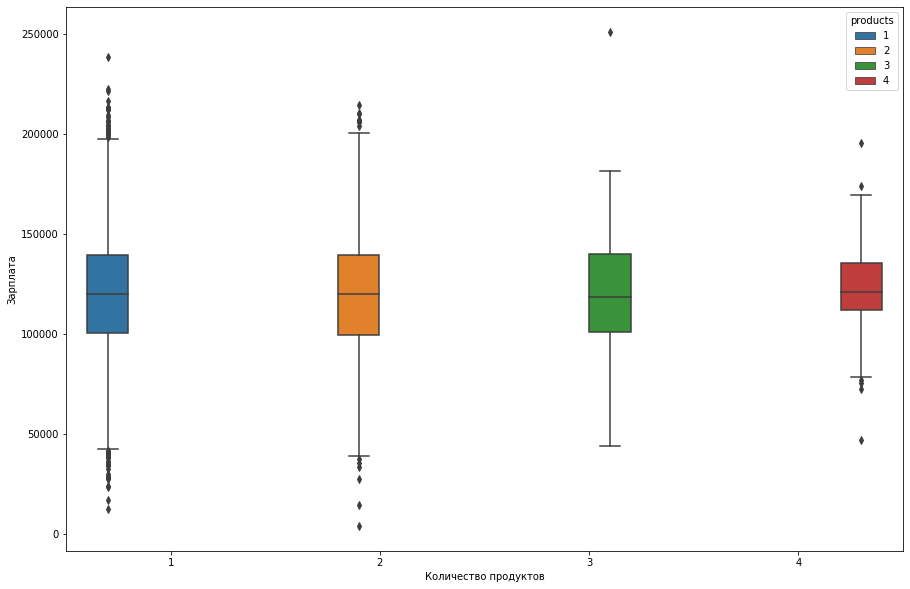

In [36]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'products', y='balance', hue = 'products',  data=df)
plt.ylabel('Зарплата')
plt.xlabel('Количество продуктов')
plt.show()

In [37]:
#строю таблицу зависимости количества продуктов от баланса
df_bal = df.pivot_table(index = 'products', values = 'balance', aggfunc = 'mean').reset_index()

In [38]:
df_bal

,products,balance
0,1,119894.163723
1,2,119660.944362
2,3,119475.686310
3,4,122260.610870


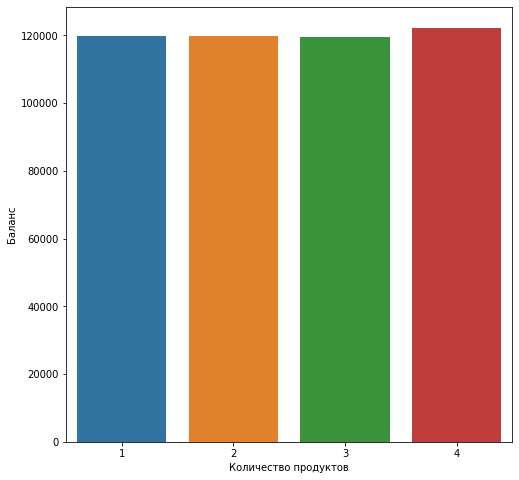

In [39]:
# строю график 
c

### score
<a name="2.12"></a><br/>

In [40]:
# делаю такую же таблицу по скорингу
df_score = df.pivot_table(index = 'products', values = 'score', aggfunc = 'mean').reset_index()

In [41]:
df_score

,products,score
0,1,649.120968
1,2,652.188671
2,3,648.105263
3,4,653.583333


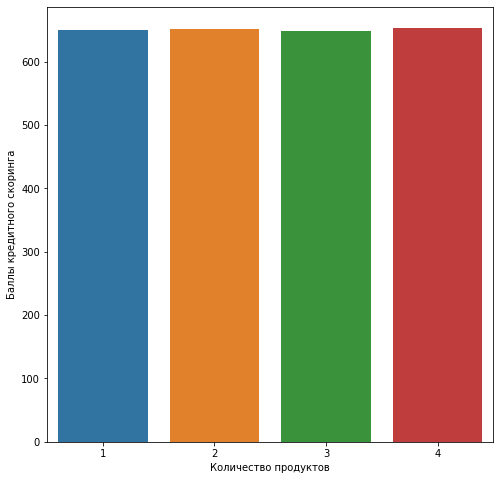

In [42]:
plt.figure(figsize = (8,8))
sns.barplot(x = df_score['products'],y = df_score['score'], data=df_score)
plt.ylabel('Баллы кредитного скоринга')
plt.xlabel('Количество продуктов')
plt.show()

Скоринг так же у клинтов с разным количество продуктов почти одинаковый

In [43]:
ff = df.groupby('products').agg('mean')

In [44]:
ff

,id,age,salary,balance,objects,score,loyalty,creditcard,churn
products,,,,,,,,,
1,1.573237e+07,39.673092,99487.256851,119894.163723,4.974626,649.120968,0.504131,0.703777,0.277144
2,1.573484e+07,37.753595,100452.012821,119660.944362,5.051852,652.188671,0.532898,0.707190,0.075817
3,1.574182e+07,43.195489,104318.130564,119475.686310,5.003759,648.105263,0.424812,0.714286,0.827068
4,1.571936e+07,45.683333,104763.723333,122260.610870,5.300000,653.583333,0.483333,0.683333,1.000000


### Вывод
<a name="2.13"></a><br/>

* Клиенты с 1 продуктом

Этих клиентов больше всего их 51 %. Средний возраст около 40 лет. Мужчин в выбоке чуть больше. Соответсвенно их больше в клиентах с одним продуктом.У них наименьшая оцениваемая зарплата - 99 тысяч. Баланс у всех клиентов примерно одинаковый около 120 тысяч. Количество объектов всех клиентов тоже почти не отличается около 5. Что на мой взгляд, выглядит странно. Баллы кредитного скоринка у всех клиенто тоже примерно одинаковый около 650 баллов. Активными являются только половина клиентов в не зависимости от количества продуктов. Интересно то, что больше половины клиентов имеют кредитные карты, не смотря на то,что это их единственный продукт. 

* Клиенты с 2 продуктами

Этих клиентом чуть меньше их 45 %. Средний возрас самый нихкий из всех около 38. Здесь мужчин также больше. Оцениваевая зарплато чуть выше - 100 тысяч. Баланс такой же как и всех остальных клиентов. Клиенты с двумя продуктами являются чуть более активными клиентами. Реже уходят в отток.

* Клиенты с 3 продуктами

Этих клиентов около 3 %. Их средний возраст выше около 43 лет. Среди них чуть больше женщин. Зарплата выше около 104 тысяч. Но баланс примерно такой же 119 тысяч.Они менее активны, чем клиенты с одним и двумя продуктами. Эти клиенты очень часто уходят в отток.

* Клиенты с 4 продуктами

Таких клиентов меньше 1%. Их средний возраст наиболее высокий около 46 лет. Среди них женщин гораздо больше,чем мужчин. Зарплата у них такая же как и у клиенто с 3 продуктами - 104 тысячи. А баланс ещё больше 122 тысяч. Среди них активных и неактивных пользователей примерно поровну. Удивительно кажется то, что среди клиентов с 4 продуктами все ущли в отток, с тремя ушли в отток 80 % клиентов. Стабильнне всего клиенты с двумя продуктами. У них отток почти нет.


<div class='alert alert-success'>
Мне кажется ты хорошо постарался в данном разделе и отрисовал очень аккуратные и хорошо читаемые графики. Из возможностей улучшить отмечу возможность отрисовки на круговых диаграммах помимо процентов еще и абсолютные значения. Для столбчатых диаграмм очень удобно еще добавлять сетку, а также  делать подписи сверху с доп информацией о проценте относительно сегмента. 

##  Формулировка и проверка статистических гипотез
<a name="3."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним
<a name="3.1"></a><br/>

Формулировка гипотезы
   * Нулевая гипотеза: Доходы клиентов пользующихся одним продуктом не отличаются от доходов клиентов пользующихся двумя
   *  Альтернативная гипотеза: Доходы клиентов пользующихся одним продуктом отличаются от доходов клиентов пользующихся двумя

In [45]:
products_1 = df.query('products == 1')
products_2 = df.query('products == 2')

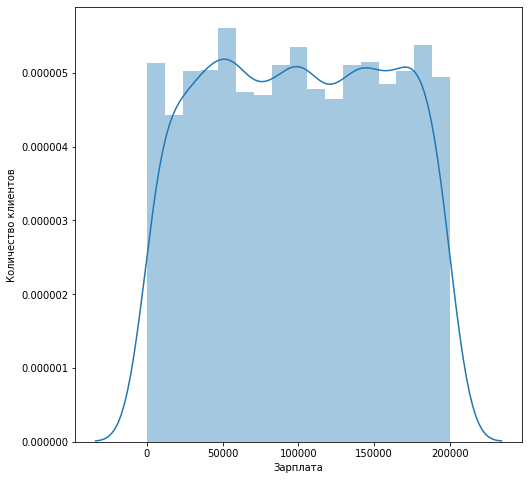

In [46]:
#рисую график распределения зарплат клиентов с двумя продуктами
plt.figure(figsize = (8,8))
sns.distplot(products_2['salary'])
plt.ylabel('Количество клиентов')
plt.xlabel('Зарплата')
plt.show()

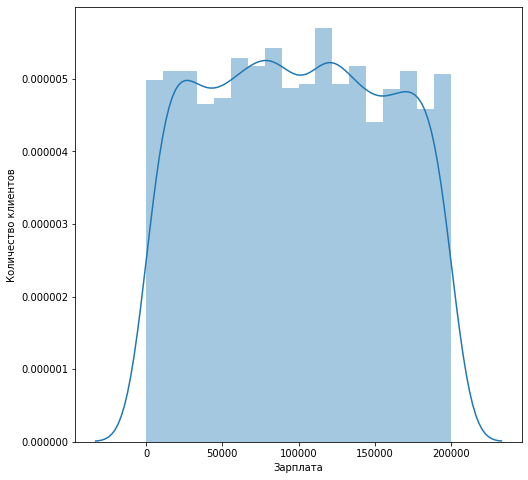

In [47]:
#рисую график распределения зарплат клиентов с одним продуктом
plt.figure(figsize = (8,8))
sns.distplot(products_1['salary'])
plt.ylabel('Количество клиентов')
plt.xlabel('Зарплата')
plt.show()

In [48]:
# так как распределение имеет ненормальное распределение для проверки гипотез я буду использовать тест манна-уитни
alpha = 0.01
results =  mannwhitneyu(products_1['salary'], products_2['salary'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние доходы могут отличаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние доходы могут быть равны.")

p-значение: 0.20397833259638254
Не отвергаем нулевую гипотезу. Средние доходы могут быть равны.


### Проверка гипотезы различия баллов скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним
<a name="3.2"></a><br/>

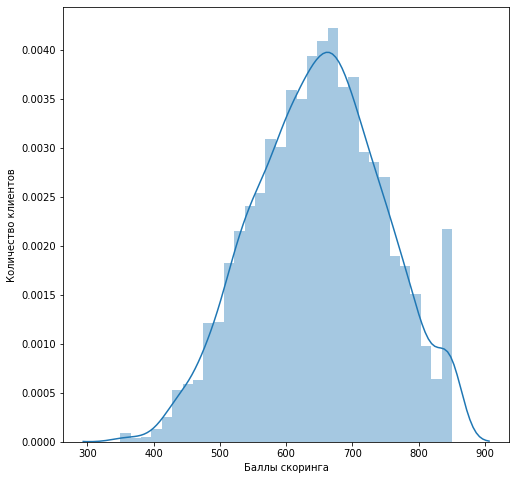

In [49]:
#рисую график распределения скоринга клиентов с одним продуктом
plt.figure(figsize = (8,8))
sns.distplot(products_1['score'])
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы скоринга')
plt.show()

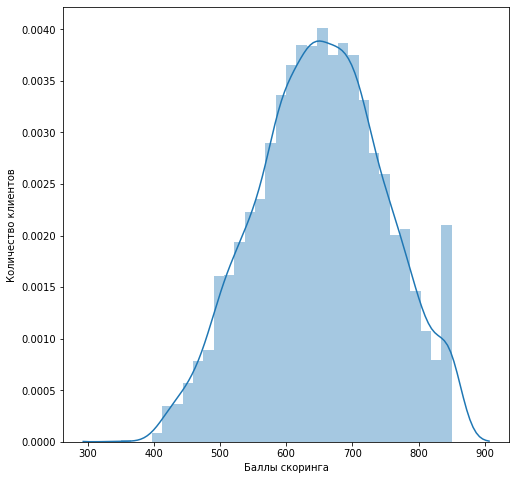

In [50]:
#рисую график распределения скоринга клиентов с двумя продуктами
plt.figure(figsize = (8,8))
sns.distplot(products_2['score'])
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы скоринга')
plt.show()

Формулировка гипотезы
   * Нулевая гипотеза : Средние быллы скоринга клиентов пользующихся одним продуктом не отличаются от доходов клиентов пользующихся двумя
   * Альтернативная гипотеза:  Средние быллы скоринга пользующихся одним продуктом отличаются от доходов клиентов пользующихся двумя

In [51]:
# не смотря на то что распределение имеет нормальное распределение для проверки гипотез я всё равно могу использовать тест манна-уитни 
alpha = 0.01 
results = mannwhitneyu(products_1['score'], products_2['score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние быллы скоринга разные.")
else:
    print("Не отвергаем нулевую гипотезу. Средние быллы скоринга одинаковые.")

p-значение: 0.07864869516569403
Не отвергаем нулевую гипотезу. Средние быллы скоринга одинаковые.


<div class='alert alert-danger'>
Для корректной проверки гипотез тебе не хватает предпоссылок для выбора конкретного стат теста. А также внимательнее отнесись к формулировке гипотез.

<div class='alert alert-danger'>
Не вижу правок, презентации и дашборда (по желанию). 

Я добавил графики обоснующие выбор стат теста и изменил формулировки гипотез 😣

<div class='alert alert-success'>
Спасибо за правки, теперь у тебя соблюдены все этапы проверки стат гипотез. В целом у тебя хорошая работа. Я жду твоей презентации в которой у тебя обязетльно должны быть указаны рекомендации по работе с сегментами. Сам проект принят, ты хорошо постарался. 